In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

# 1.
Snake eyes: $$\frac{1}{6} \frac{1}{6} = \frac{1}{36}$$
Sevens: $$\sum_{z} P_A(z)P_B(x-z)=\sum^{7}\frac{1}{6} \frac{1}{6} =\frac{6}{36} = \frac{1}{6}$$
Ratio of snake eyes to sevens: $$\frac{\frac{1}{36}}{\frac{1}{6}} = \frac{1}{6}$$

# 2.
|   | 1 | 2 | 3 | 4  | 5  | 6  |
|---|---|---|---|----|----|----|
| 1 | 2 | 3 | 4 | 5  | 6  | 7  |
| 2 | 3 | 4 | 5 | 6  | 7  | 8  |
| 3 | 4 | 5 | 6 | 7  | 8  | 9  |
| 4 | 5 | 6 | 7 | 8  | 9  | 10 |
| 5 | 6 | 7 | 8 | 9  | 10 | 11 |
| 6 | 7 | 8 | 9 | 10 | 11 | 12 |


The left column contains the number rolled by one die, and the top row contains the number rolled by the other die. The middle of the table has the sum of the two dice. 
$$P_{A+B}(z) = \sum_{z}P_A(z)P_B(x-z)\text{ for } z>x\\
P_{4} = P_1 P_3 + P_2 P_2 + P_3 P_1
= \frac{1}{36} + \frac{1}{36}+ \frac{1}{36}
= \frac{1}{12}$$

In [2]:
n = 2
die_pdf = np.ones(6) * 1/6
sum_prob = np.convolve(die_pdf, die_pdf)

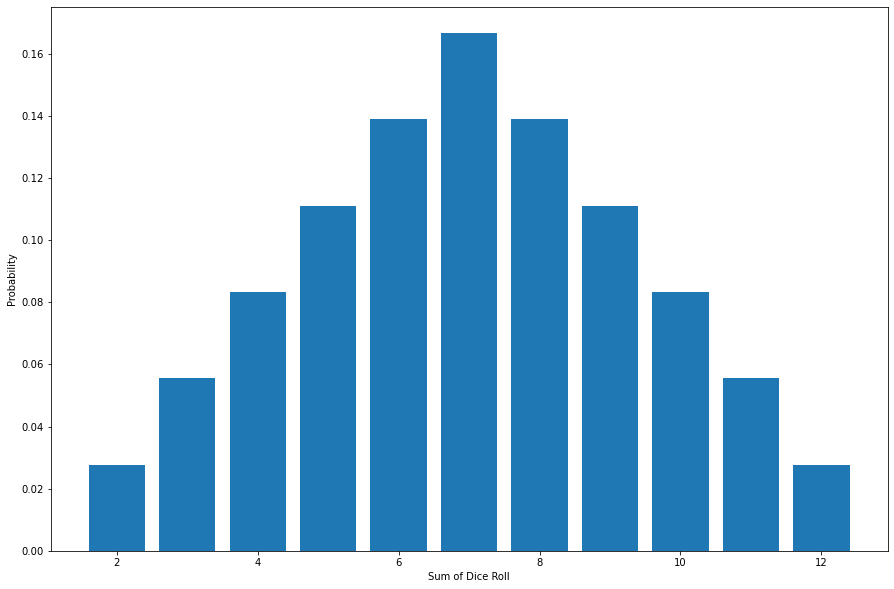

In [3]:
sum_val = np.arange(n,6*n+1)
plt.bar(sum_val, sum_prob)
plt.xlabel('Sum of Dice Roll')
plt.ylabel('Probability')
plt.show()

# 3. 


In [4]:
mean = sum(sum_val*sum_prob)
variance = sum((sum_val-mean)**2 * sum_prob)
print(mean, variance)

7.0 5.833333333333334


# 4. 


In [5]:
n = 10
sum_prob = die_pdf
for i in range(n-1):
    sum_prob = np.convolve(die_pdf, sum_prob)
sum_prob 

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

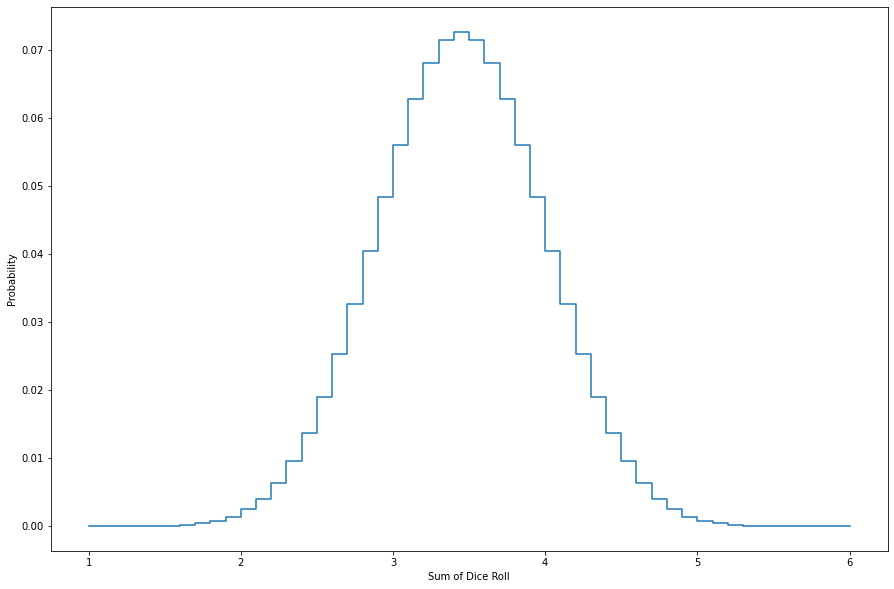

In [6]:
sum_val = np.arange(n,6*n+1)
plt.step(sum_val/10, sum_prob)
plt.xlabel('Sum of Dice Roll')
plt.ylabel('Probability')
plt.show()

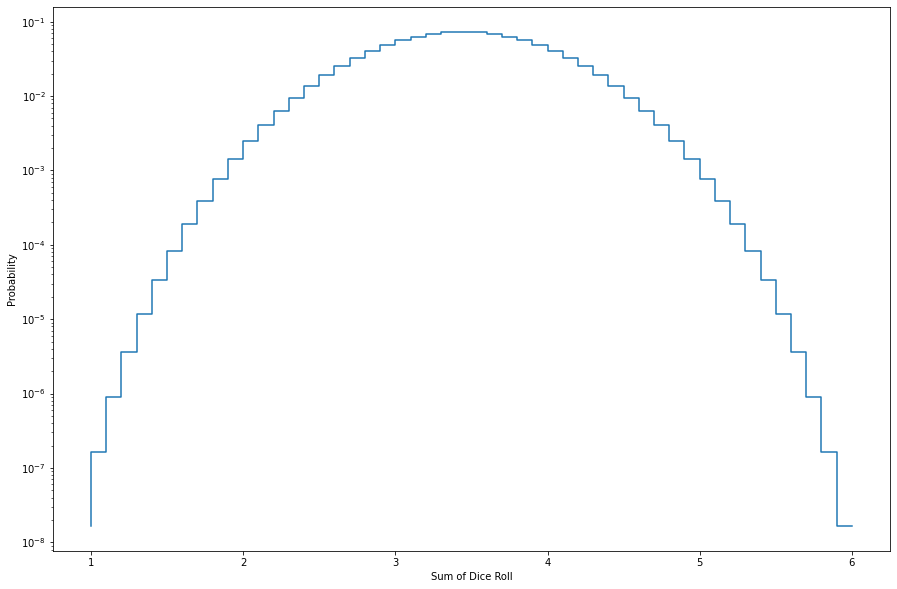

In [8]:
sum_val = np.arange(n,6*n+1)/10
plt.step(sum_val, sum_prob)

plt.semilogy()
plt.xlabel('Sum of Dice Roll')
plt.ylabel('Probability')
plt.show()

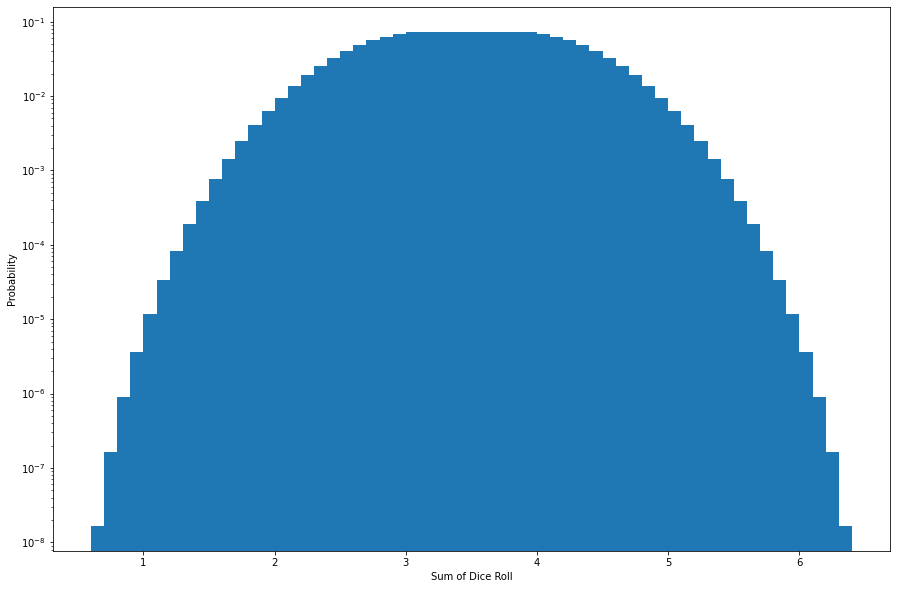

In [9]:
sum_val = np.arange(n,6*n+1)/10
plt.bar(sum_val, sum_prob)

plt.semilogy()
plt.xlabel('Sum of Dice Roll')
plt.ylabel('Probability')
plt.show()

Yes it is Gaussian because when it is plotted with a log y-axis it is in the shape of an upside down parabola. On the step plot it looks like it is not symmetric, however when plotted with a bar plot, it can be seen that the ends are actually symmetric. 

# 5.

In [58]:
gaussian_pdf = []
x = np.linspace(-4, 4, num=50)
for i in range(50):
    gaussian_pdf.append(stats.norm.pdf(x[i]))
gaus_conv = np.convolve(gaussian_pdf, gaussian_pdf)

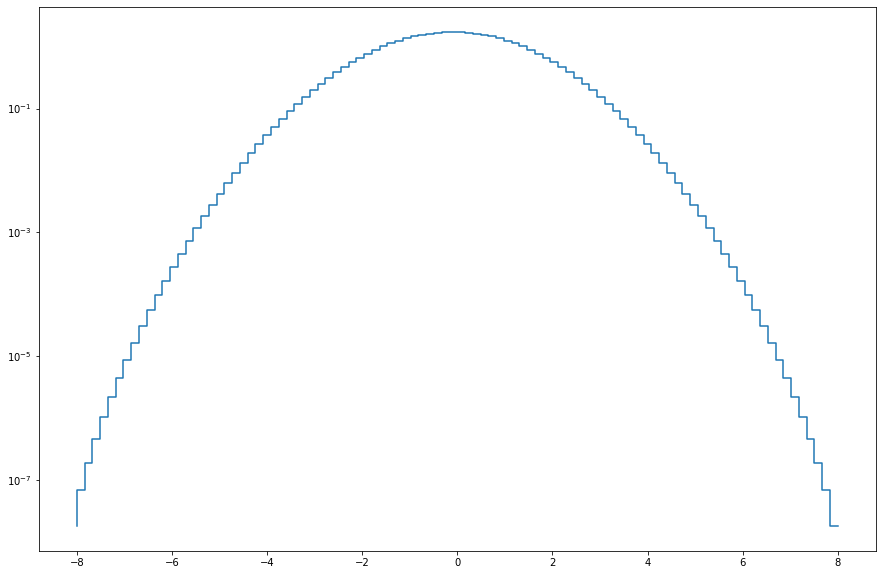

In [61]:
x_1 = np.linspace(-8, 8, num=len(gaus_conv))
plt.step(x_1, gaus_conv)
plt.semilogy()
plt.show()

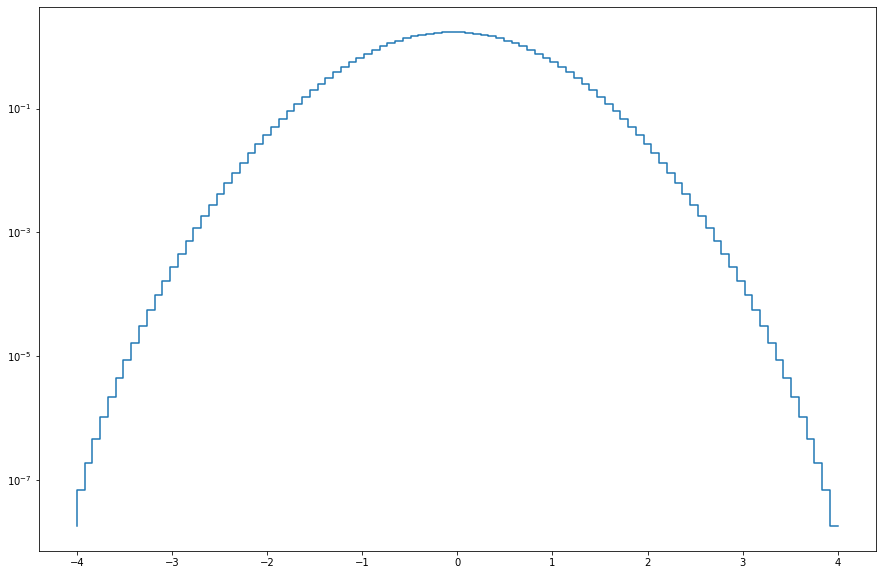

In [62]:
x_2 = x_1/2
plt.step(x_2, gaus_conv)
plt.semilogy()
plt.show()

In [63]:
mean = sum(x*gaussian_pdf)
variance = sum((x-mean)**2 * gaussian_pdf)

mean_1 = sum(x_1*gaus_conv)
variance_1 = sum((x_1-mean_1)**2 * gaus_conv)

mean_2 = sum(x_2*gaus_conv)
variance_2 = sum((x_2-mean_2)**2 * gaus_conv)

print(mean, mean_1, mean_2)
print(variance, variance_1, variance_2)

8.012254054667878e-17 -4.443528779716531e-15 -2.2217643898582654e-15
6.119992498830809 74.96662014018258 18.741655035045646


The standard deviation increases when two Gaussians are convolved. Even when the convolution is averaged, the standard deviation is still higher than the original Gaussian's standard deviation. This means that integrating a signal for longer periods of time increases the noise which increases the standard deviation. So for longer periods of time, it is more likely that you will get a signal-like reading from the noise. 